In [1]:
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline, AutoPipelineForText2Image
import torch

pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

pipeline.enable_model_cpu_offload()

refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16"
).to("cuda")

refiner.enable_model_cpu_offload()

pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")




C:\Users\dan_d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]


100%|██████████| 50/50 [23:56<00:00, 28.73s/it]


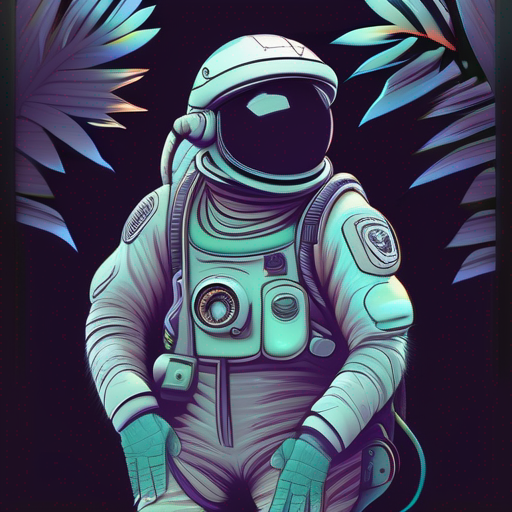

In [3]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image = pipeline_text2image(prompt=prompt, height=512, width=512).images[0]
image

100%|██████████| 50/50 [30:43<00:00, 36.88s/it]


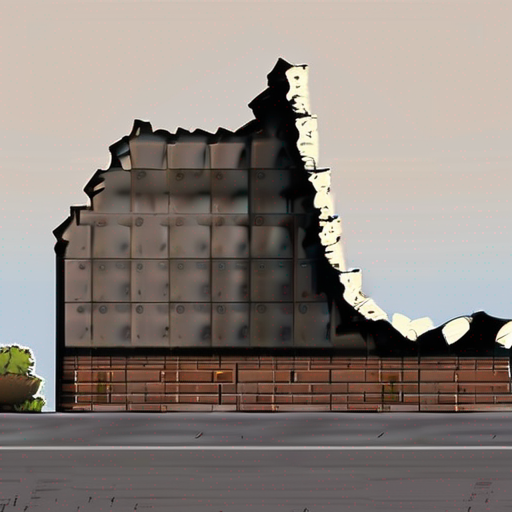

In [5]:
prompt = "Wall with heavy damage"
image = pipeline_text2image(prompt=prompt, height=512, width=512).images[0]
image